In [133]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2

# Question 7.1

Let $X = Z^{2}$ where $Z\sim \mathcal{N}(0,1)$ is the standard normal. The random variable $X$ has a chi-squared distribution with 1 degree of freedom. For each of the following problems, calculate the answer in the following two ways:

A) Using Monte Carlo methods, sampling from a standard normal distribution, and taking the number of samples equal to $10^{k}$ for each value $k=2,4,6.$

B) Using the appropriate built-in functions from your prefered computational tool.

Compare the results of the various computations

i) Plot the pdf of the random variable X (experiment to find a good  number of bins for your histogram)

ii) Compute the c.d.f. $F_{X}(x)$ for $x\in \{0.5, 1.0, 1.5\}$

iii) Compute the expected value $\mathbb{E}[X]$

iv) Compute the variance Var $(X)$.

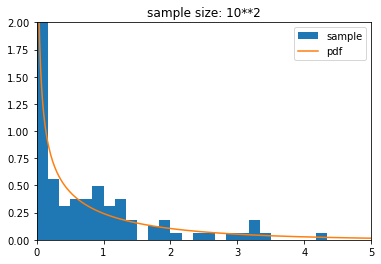

Sample | Built-in	F(0.5) = 0.48    | 0.5204998778130466
Sample | Built-in	F(1.0) = 0.68    | 0.6826894921370859
Sample | Built-in	F(1.5) = 0.82    | 0.7793286380801531

Sample   E[X] = 0.9804873217106398
Built-in E[X] = 0.9999999999999908

Sample   Var(X) = 1.9802303043371166
Built-in Var(X) = 2.0


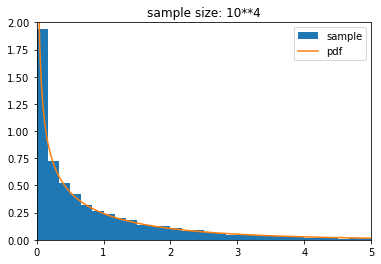

Sample | Built-in	F(0.5) = 0.5174  | 0.5204998778130466
Sample | Built-in	F(1.0) = 0.6814  | 0.6826894921370859
Sample | Built-in	F(1.5) = 0.7826  | 0.7793286380801531

Sample   E[X] = 0.9900323224464409
Built-in E[X] = 0.9999999999999908

Sample   Var(X) = 1.951214781451826
Built-in Var(X) = 2.0


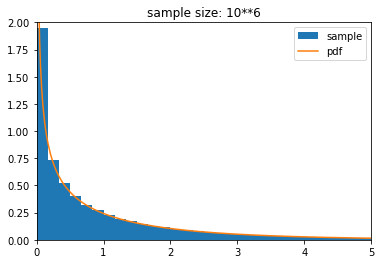

Sample | Built-in	F(0.5) = 0.520961 | 0.5204998778130466
Sample | Built-in	F(1.0) = 0.682443 | 0.6826894921370859
Sample | Built-in	F(1.5) = 0.778845 | 0.7793286380801531

Sample   E[X] = 1.0015010721660416
Built-in E[X] = 0.9999999999999908

Sample   Var(X) = 2.010496264322482
Built-in Var(X) = 2.0


In [58]:
def p1():
    """Complete problem 1"""
    
    for k in (2, 4, 6):
        # Number of samples
        n = 10**k

        # Sample n draws from standard normal distribution (Z~N(0, 1))
        sample = np.random.standard_normal(size=n)

        # Square each draw to get X=Z**2
        sample **= 2

        # Plot histogram of sample from X
        plt.hist(sample, range=(0, 5), bins=30, density=True, label='sample')

        # Plot built-in chi-squared pdf
        DF = 1 # 1 degree of freedom
        x = np.linspace(0, 15, 1000)
        y = chi2.pdf(x, DF)
        plt.plot(x, y, label='pdf')

        # Set up plot
        plt.title(f'sample size: 10**{k}')
        plt.xlim(0, 5)
        plt.ylim(0, 2)
        plt.legend()
        plt.show()

        # Estimate and compute the cdf of X F(t) for each t
        for t in (0.5, 1.0, 1.5):
            print(f'Sample | Built-in\tF({t}) = {np.count_nonzero(sample < t) / n : <7} | {chi2.cdf(t, DF)}')
        print()
        
        # Estimate and compute the expected value of X
        print(f'Sample   E[X] = {np.mean(sample)}')
        print(f'Built-in E[X] = {chi2.expect(args=(DF,))}')
        print()

        # Estimate and compute the variance of X
        print(f'Sample   Var(X) = {np.var(sample)}')
        print(f'Built-in Var(X) = {chi2.var(DF)}')

        

        

p1()

# Question 7.2

Write code to approximate $\pi$ using the Monte Carlo methods in the reading, by sampling pairs from the uniform distribution on $[-1,1]\times [-1,1]$ and counting the proportion that lie inside the circle $x^2 + y^2 \leq 1$. Sample $10^k$ times for $k\in\{2,4,6\}$ and compare the results to the true value of $\pi.$ Calculate the (approximate) standard error for each of these estimates.

In [117]:
def p2():
    """Compute problem 2"""

    print(f'pi\t\t{np.pi}')

    for k in (2, 4, 6):
        # Number of samples
        n = 10**k

        # Sample n draws from uniform distribution on [-1,1]x[-1,1]
        # (Get two lists for n draws from Uniform([-1,1]), then tranpose to get pairs)
        sample = np.transpose([np.random.uniform(-1, 1, size=n), np.random.uniform(-1, 1, size=n)])
        
        # Count the proportion of points inside the unit circle (sum the indicator function on unit circle)
        count_inside_unit_circle = np.count_nonzero([x**2 + y**2 <= 1 for x, y in sample])

        ybar = 1/n * count_inside_unit_circle
            
        # Approximate pi
        pi_approx = 4*ybar

        # Approximate the standard error
        se_approx = 4*((count_inside_unit_circle - n * ybar**2)/(n*(n-1)))**(1/2)
        
        print(f'10**{k} pi approx\t{pi_approx}')
        print(f'SE approx\t{se_approx}')
        print()
p2()

pi		3.141592653589793
10**2 pi approx	3.24
SE approx	0.15771089776146496

10**4 pi approx	3.14
SE approx	0.01643371554763773

10**6 pi approx	3.140472
SE approx	0.001642962664378688



# Question 7.3 

There are at least two different Monte Carlo methods you could use to approximate the area under the curve $y = e^{\text{cos}(x^2)}$ for $x\in [0,2]$.

i) Estimate the integral
\begin{equation}
    \int_{0}^{2}h(x)dx = 2* \int_{0}^{2}h(x)f_{\text{Uniform}([0,2])}(x)dx = 2\mathbb{E}[h\circ X]
\end{equation}
by approximating $\mathbb{E}[h\circ X]$, with sampling from the Uniform$([0,2])$ at least $10^5$. What is the (approximate value of the) standard error?

ii) Estimate the area under the curve by taking a 2d-sample
\begin{equation}
    Z \sim \text{Uniform}([0,2]) \times \text{Uniform}([0,b])
\end{equation}
for some $b$ with $b\geq \text{max}_{x\in [0,2]}e^{\text{cos}(x^2)}$ and then count (and scale appropriately) the samples that lie under the curve. This corresponds to estimating a multiple of $\mathbb{E}[k\circ Z]$, where $k=\mathbb{1}_{A}$ and $A=\{(x,y) | 0 \leq y\leq e^{\text{cos}(x^2)}\}$. Sample at least $5 \times 10^4$ times. What is the (approximate value of the) standard error?

Compare the results of the two methods.

In [131]:
def prob3():
    """Complete problem 3"""

    # Size of sample
    n = 10**5

    # Integrate h(x) from a to b
    a, b = 0, 2

    ### Method 1
    # Get sample points on Uniform([a,b]) and evaluate points with function
    sample_pts = np.random.uniform(a, b, n)
    sample = np.exp(np.cos(sample_pts**2))

    ybar = 1/n * sum(sample)

    # Approx integral
    estimate = 2 * ybar

    # Approx standard error
    se_approx = 2 * ((sum(sample**2) - n * ybar**2)/(n*(n-1)))**(1/2)

    print('Method 1')
    print(f'Integral approx\t{estimate}')
    print(f'SE approx\t{se_approx}')

    ### Method 2
    # c >= max(h(x)) on [a,b], calculated in cell below
    c = 2.8

    # Sample n draws from uniform distribution on [-1,1]x[-1,1]
    # (Get two lists for n draws from Uniform([-1,1]), then tranpose to get pairs)
    sample = np.transpose([np.random.uniform(a, b, size=n), np.random.uniform(0, c, size=n)])
    
    # Count the proportion of points inside the unit circle (sum the indicator function on unit circle)
    count_under_h = np.count_nonzero([y <= np.exp(np.cos(x**2)) for x, y in sample])

    ybar = 1/n * count_under_h
        
    # Approximate area under 
    estimate = (b-a)*c * ybar

    # Approximate the standard error
    se_approx = (b-a)*c * ((count_under_h - n * ybar**2)/(n*(n-1)))**(1/2)
    
    print('Method 2')
    print(f'Integral approx\t{estimate}')
    print(f'SE approx\t{se_approx}')

prob3()

Method 1
Integral approx	3.2168434173849074
SE approx	0.005968592135537259
Method 2
Integral approx	3.216864
SE approx	0.008755741583963451


# Question 7.4

Use Monte Carlo methods to estimate the probability that a sample from Beta(2,5) will be less than a sample from Beta(20,55). How many samples are required to give 95% confidence that your answer is correct to three decimals places?

In [261]:
def p4():
    """Complete problem 4"""

    # Sample size
    n = 5*10**6

    ### Sample from Beta(2,5)
    a1, b1 = 2, 5
    s1 = np.random.beta(a1, b1, n)

    ### Sample from Beta(20, 55)
    a2, b2 = 20, 55
    s2 = np.random.beta(a2, b2, n)

    # Compute xbar and estimate SE
    xbar = np.count_nonzero([x1 < x2 for x1, x2 in zip(s1, s2)])/n
    se_approx = (np.sum([(int(x1 < x2) - xbar)**2 for x1, x2 in zip(s1,s2)])/(n*(n-1)))**(1/2)

    print(f'proportion of sample Beta({a1},{b1}) < Beta({a2},{b2})\t{xbar}')
    print(f'SE approx\t{se_approx*2}')

p4()

proportion of sample Beta(2,5) < Beta(20,55)	0.4997836
SE approx	0.000447213598336223


So about $n = 5*10^6$ samples are required to be 95% confident that our proportion is accurate to within 3 decimal places, since with this $n$ we find the estimated SE is less than 0.001

# Question 7.5

Consider a game where you roll a fair four-sideed die with sides labeled \$1, 2, 3, \text{ and } 4$. You win \$1 if the die shows 1 or 2, you win \$2 if the die shows 3, and you lose $1 if the die shows 4. Use Monte Carlo simulation methods to estimate the probability that your winnings will be negative after 10 rolls of the die. Justify your choice of the number of samples to use.

In [262]:
def die_winnings(x):
    """Amount won/lost given a roll on a four-sided die"""

    if x in (1, 2):
        return 1
    elif x in (3,):
        return 2
    elif x in (4,):
        return -1
    else:
        raise ValueError('x not in (1, 2, 3, 4)')

def dice_winnings(num_rolls=10):
    """Roll a fair four-sided die num_rolls time and return the winnings"""

    rolls = np.random.choice(list(range(1, 5)), size=num_rolls)

    # Return the winnings
    winnings = sum(die_winnings(roll) for roll in rolls)
    return winnings

def p5():
    """Complete problem 5"""

    # Sample size
    n = 10**5

    sample = [dice_winnings() for _ in range(n)]

    # Compute xbar and estimate SE
    xbar = np.count_nonzero([winnings < 0 for winnings in sample])/n
    se_approx = (np.sum([(int(winnings < 0) - xbar)**2 for winnings in sample])/(n*(n-1)))**(1/2)

    print(f'Proportion of negative winnings\t{xbar}')
    print(f'SE approx\t{se_approx*2}')

p5()

Proportion of negative winnings	0.01341
SE approx	0.0007274697025455295


So about $n = 5*10^6$ samples are required to be 95% confident that our proportion is accurate to within 3 decimal places, since with this $n$ we find the estimated SE is less than 0.001